In [1]:
# Location of where files are saved.
original_df                  = 'WildlandFirePerimeters.csv'
PreProcessed_df              = 'csv_file_preprocessing\df_A.csv'
Weather_WithAddress          = 'csv_file_preprocessing\df_B_Stage1.csv'
Weather_Fire_WeatherInfo     = 'csv_file_preprocessing\df_B_Stage2.csv'
Weather_Create_NoFire_Sample = 'csv_file_preprocessing\df_B_Stage3.csv'
Weather_NoFire_WeatherInfo   = 'csv_file_preprocessing\df_B_Stage4.csv'
Weather_Final_Cleaned_df     = 'df_Cleaned.csv'

# Pre-Process

##### Pre-Process (Section 1)

In [2]:
#Import required libraries
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, requests
from pandas import to_datetime as dt
from datetime import timedelta

In [3]:
# Load database as DataFrame
df_ORG = pd.read_csv(original_df)

In [4]:
#checkinig for overall statistics of original dataset (mean, number of missing records, etc.)
stat = df_ORG.describe()

for col in df_ORG.columns:
    stat.loc['Missing',col] = len(df_ORG[df_ORG[col].isnull() == True])
    stat.loc['Zero',col] = len(df_ORG[df_ORG[col] == 0])
    
stat.style.format("{:.0f}")

,OBJECTID,poly_GISAcres,poly_Acres_AutoCalc,irwin_CalculatedAcres,irwin_DailyAcres,irwin_DiscoveryAcres,irwin_EstimatedCostToDate,irwin_FFReportApprovedByTitle,irwin_FFReportApprovedByUnit,irwin_FSConfinePercent,irwin_FSFullSuppPercent,irwin_FSMonitorPercent,irwin_FSPointZonePercent,irwin_InitialLatitude,irwin_InitialLongitude,irwin_InitialResponseAcres,irwin_IsFireCauseInvestigated,irwin_IsFireCodeRequested,irwin_IsFSAssisted,irwin_IsMultiJurisdictional,irwin_IsReimbursable,irwin_IsTrespass,irwin_IsUnifiedCommand,irwin_PercentContained,irwin_PercentPerToBeContained,irwin_POOLegalDescSection,irwin_TotalIncidentPersonnel,irwin_IsDispatchComplete,irwin_GlobalID,irwin_ArchivedOn,SHAPE_Length,SHAPE_Area,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_GlobalID,poly_Source,irwin_ABCDMisc,irwin_ADSPermissionState,irwin_ContainmentDateTime,irwin_ControlDateTime,irwin_DispatchCenterID,irwin_FFReportApprovedDate,irwin_FireBehaviorGeneral,irwin_FireBehaviorGeneral1,irwin_FireBehaviorGeneral2,irwin_FireBehaviorGeneral3,irwin_FireCause,irwin_FireCauseGeneral,irwin_FireCauseSpecific,irwin_FireCode,irwin_FireDepartmentID,irwin_FireDiscoveryDateTime,irwin_FireMgmtComplexity,irwin_FireOutDateTime,irwin_FSJobCode,irwin_FSOverrideCode,irwin_GACC,irwin_ICS209ReportDateTime,irwin_ICS209RForTimePeriodFrom,irwin_ICS209RForTimePeriodTo,irwin_ICS209ReportStatus,irwin_IncidentManagementOrg,irwin_IncidentName,irwin_IncidentShortDescription,irwin_IncidentTypeCategory,irwin_IncidentTypeKind,irwin_InitialResponseDateTime,irwin_IrwinID,irwin_LocalIncidentIdentifier,irwin_POOCity,irwin_POOCounty,irwin_POODispatchCenterID,irwin_POOFips,irwin_POOJurisdictionalAgency,irwin_POOJurisdictionalUnit,irwin_POOJurisdUnitParentUnit,irwin_POOLandownerCategory,irwin_POOLandownerKind,irwin_POOLegalDescPrinMeridian,irwin_POOLegalDescQtr,irwin_POOLegalDescQtrQtr,irwin_POOLegalDescRange,irwin_POOLegalDescTownship,irwin_POOPredServiceAreaID,irwin_POOProtectingAgency,irwin_POOProtectingUnit,irwin_POOState,irwin_PredominantFuelGroup,irwin_PredominantFuelModel,irwin_PrimaryFuelModel,irwin_SecondaryFuelModel,irwin_UniqueFireIdentifier,irwin_WFDSSDecisionStatus,irwin_CreatedBySystem,irwin_ModifiedBySystem,irwin_OrganizationalAssessment,irwin_StratDecisionPublishDate,irwin_Source,irwin_ModifiedOnDateTime_dt,irwin_CreatedOnDateTime_dt,GlobalID
count,7125,5427,7119,2025,7060,6444,1241,0,0,1213,1213,1213,1213,5843,5843,3724,1866,7125,6219,5860,5971,6081,1245,1267,1269,163,1093,7125,0,0,7125,7125,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,7926,1980,1677,5307,1794,74,2868080,nan,nan,4,85,8,2,41,-110,213,1,0,1,0,0,0,0,87,90,17,42,0,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,3756,17315,15528,29629,19141,1640,12483849,nan,nan,17,34,27,14,7,15,3724,0,0,0,0,0,0,0,31,30,10,146,0,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,127,0,0,0,0,0,0,nan,nan,0,0,0,0,0,-166,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [5]:
#checking for columns headers (variable names)
print(f'The dataset has {len(df_ORG.columns)} columns.')
pd.DataFrame(df_ORG.columns,columns =['Column Name'])

The dataset has 105 columns.


,Column Name
0,OBJECTID
1,poly_IncidentName
2,poly_FeatureCategory
3,poly_MapMethod
4,poly_GISAcres
...,...
100,irwin_ModifiedOnDateTime_dt
101,irwin_CreatedOnDateTime_dt
102,GlobalID
103,SHAPE_Length


##### Pre-Process (Section 2)

In [6]:
# Slicing the columns that will be used for modeling

Column_remap = {
'OBJECTID'                    : 'OBJECTID',
'irwin_FireDiscoveryDateTime' : 'Date_Start',
'irwin_FireOutDateTime'       : 'Date_Finish',
'poly_GISAcres'               : 'Acres',
'irwin_FireCause'             : 'FireCause',
'irwin_InitialLatitude'       : 'Lat',
'irwin_InitialLongitude'      : 'Long',
'irwin_POODispatchCenterID'   : 'DispatchCenterID',
'irwin_PredominantFuelGroup'  : 'PredominantFuelGroup',
'irwin_POOState'              : 'State'}

df = df_ORG.rename(columns=Column_remap)
df = df[Column_remap.values()]

# Standardize the date column
df.Date_Start = pd.to_datetime(df.Date_Start).dt.strftime('%Y-%m-%d') 
df.Date_Finish = pd.to_datetime(df.Date_Finish).dt.strftime('%Y-%m-%d') 

df

,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State
0,127,2020-10-18,2021-03-10,562.913504,Unknown,36.071140,-121.45050,CALPCC,NaN,US-CA
1,128,2020-05-01,NaN,0.151680,Unknown,39.556690,-119.55850,NVSFC,Grass,US-NV
2,129,2020-08-08,2020-08-20,0.300000,Human,33.293840,-110.45000,AZPHC,Grass-Shrub,US-AZ
3,130,2020-05-08,2020-05-26,44.300517,Human,35.875820,-115.20410,NVLIC,Grass-Shrub,US-NV
4,133,2020-08-21,2020-08-22,NaN,Human,NaN,NaN,SDGPC,Grass,US-SD
...,...,...,...,...,...,...,...,...,...,...
7120,12712,2021-07-07,NaN,191.735211,Natural,46.492160,-115.06930,IDGVC,NaN,US-ID
7121,12713,2021-05-03,NaN,38.700000,NaN,NaN,NaN,AZWDC,Timber,US-AZ
7122,12714,2021-06-06,2021-06-09,2.811551,Natural,42.122970,-113.96070,IDSCC,Brush,US-ID
7123,12716,2021-07-20,NaN,0.100000,Natural,41.108517,-119.46385,CASIFC,Grass-Shrub,US-NV


##### Pre-Process (Section 3.1)

In [7]:
#Check how many values are missing in each columns
pd.DataFrame(df.isnull().sum(), columns = ['Count of Missing Values']).T

,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State
Count of Missing Values,0,0,1069,1698,60,1282,1282,3,1723,0


##### Pre-Process (Section 3.2)

15% in Date_Finish column (1,069 records) have missing values.

Fires were contained in average of 14.470607661822985 days.

There are now 0 records with missing records in Date_Finish columns after clean up.


,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State,Fire_Duration
0,127,2020-10-18,2021-03-10,562.913504,Unknown,36.07114,-121.4505,CALPCC,NaN,US-CA,143.0
1,128,2020-05-01,2020-05-15,0.151680,Unknown,39.55669,-119.5585,NVSFC,Grass,US-NV,NaN
2,129,2020-08-08,2020-08-20,0.300000,Human,33.29384,-110.4500,AZPHC,Grass-Shrub,US-AZ,12.0
3,130,2020-05-08,2020-05-26,44.300517,Human,35.87582,-115.2041,NVLIC,Grass-Shrub,US-NV,18.0
4,133,2020-08-21,2020-08-22,NaN,Human,NaN,NaN,SDGPC,Grass,US-SD,1.0


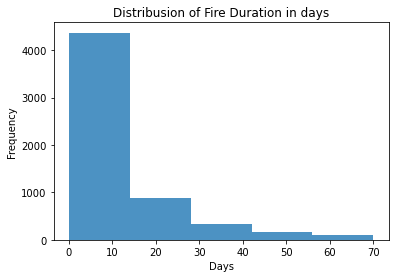

In [8]:
# Filling up the Missing Date_Finish

Empty_Date_Columns = df[df.Date_Finish.isnull() == True]
MissingValuesCount = len(Empty_Date_Columns)

print(f"{MissingValuesCount/len(df):.0%} in Date_Finish column",
      f"({MissingValuesCount:,} records) have missing values.\n")

# Find Duration of Fire in unit of days and store values in integer
df['Fire_Duration'] = dt(df.Date_Finish) - dt(df.Date_Start)
df['Fire_Duration'] = df['Fire_Duration'].dt.days

# Get mean of fire duration
Fire_Duration_mean  = df['Fire_Duration'].mean()
print(f'Fires were contained in average of {Fire_Duration_mean} days.\n')

# calculate Date_Finish for empty records based on Containment_Duration_mean.
for index in Empty_Date_Columns.index:
    df.loc[index, 'Date_Finish'] =  dt(df.loc[index, 'Date_Start']) + timedelta(days=Fire_Duration_mean)

#Show distribution of Fire Duration
ax = df.Fire_Duration.plot.hist(bins=5, alpha=0.8,range=[0,70])    

# Add title and axis names
plt.title('Distribusion of Fire Duration in days')
plt.xlabel('Days')
plt.ylabel('Frequency')


#To Verify
Empty_Date_Columns = df[df.Date_Finish.isnull() == True]
print(f'There are now {len(Empty_Date_Columns)} records with missing records in Date_Finish columns after clean up.')

# Convert to standard format and display first 5 rows
df.Date_Finish = pd.to_datetime(df.Date_Finish).dt.strftime('%Y-%m-%d'); df.head()

##### Pre-Process (Section 3.3)

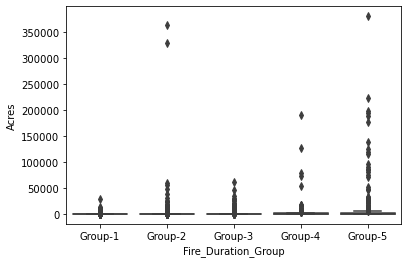

In [9]:
# Replace missing records in Acres column with column's median

Empty_Acres_Columns = df[df.Acres.isnull() == True]
df.loc[Empty_Acres_Columns.index,'Acres'] = df.Acres.median()

stealth_check = [None]
stealth_check[1:6] = (6 - 1) * ['You are about as stealthy as thunderstorm.']
stealth_check[6:11] = (11 - 6) * ['You tip-toe through the crowd of walkers, while loudly calling them names.']
stealth_check[11:16] = (16 - 11) * ['You are quiet, and deliberate, but still you smell.']
stealth_check[16:20] = (20 - 16) * ['You move like a ninja, but attracting a handful of walkers was inevitable.'] 

Fire_Duration_Group = dict(
    [(n, 'Group-1') for n in range(0, 15)]   +
    [(n, 'Group-2') for n in range(15, 30)]  +
    [(n, 'Group-3') for n in range(30, 45)]  +
    [(n, 'Group-4') for n in range(45, 60)]  +
    [(n, 'Group-5') for n in range(60, 1000)])

for i in df.index:
    Duration = df.loc[i,'Fire_Duration']
    try:
        df.loc[i,'Fire_Duration_Group'] = Fire_Duration_Group[Duration]
    except:pass

df_plot = pd.DataFrame(data = df[['Acres','Fire_Duration_Group']], columns = ['Acres','Fire_Duration_Group'])
df_plot.sort_values(by='Fire_Duration_Group', ascending=True, inplace = True)
sns.boxplot(x="Fire_Duration_Group", y="Acres", data=df_plot)
plt.show()

##### Pre-Process (Section 3.4)

<AxesSubplot:>

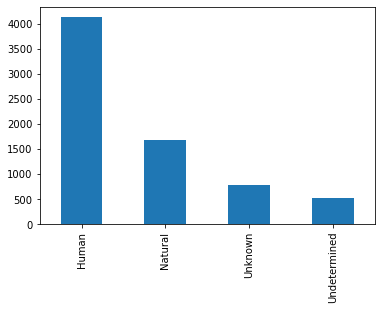

In [10]:
# Replace missing records in FireCause column with 'Unknown'

Empty_FireCause_Columns = df[df.FireCause.isnull() == True]
df.loc[Empty_FireCause_Columns.index,'FireCause'] = 'Unknown'

df['FireCause'].value_counts().plot(kind='bar')

##### Pre-Process (Section 3.5)

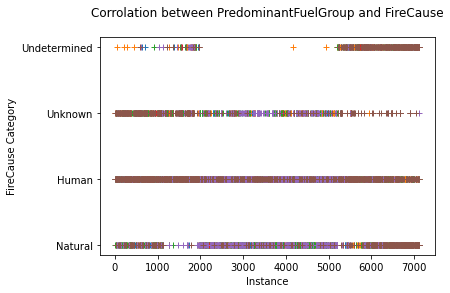

<AxesSubplot:>

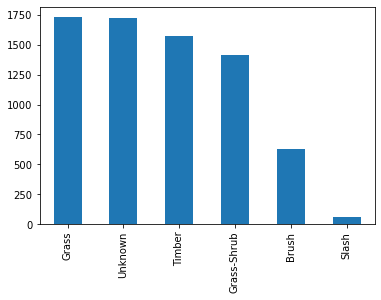

In [11]:
# Replace missing records in PredominantFuelGroup column with 'Unknown'

Empty_PredominantFuelGroup_Columns = df[df.PredominantFuelGroup.isnull() == True]
df.loc[Empty_PredominantFuelGroup_Columns.index,'PredominantFuelGroup'] = 'Unknown'


# As shown in graph, most of missing PredominantFuelGroup values have undetermined FireCause.

groups = df.groupby("PredominantFuelGroup")

for name, group in groups:
    plt.plot(group["FireCause"], marker="+", linestyle="", label=name)

plt.xlabel('Instance')
plt.ylabel('FireCause Category')
plt.title('Corrolation between PredominantFuelGroup and FireCause\n')
plt.show()

df['PredominantFuelGroup'].value_counts().plot(kind='bar')

##### Pre-Process (Section 3.6.1)

In [12]:
# Replace missing records for Latitude and Longtitude usin mean of other occured fire in that State.

Empty_Location_Columns = df[df.Lat.isnull() == True]

for i in Empty_Location_Columns.index:
    Row_State = df.loc[i,'State']
    df.loc[i,'Lat'] = df.loc[df.State == Row_State,'Lat'].mean()
    df.loc[i,'Long'] = df.loc[df.State == Row_State,'Long'].mean()

print(f'There were {len(Empty_Location_Columns)} rows had empty values.')

There were 1282 rows had empty values.


##### Pre-Process (Section 3.6.2)

In [13]:
Empty_Location_Columns_Stage1 = df[df.Lat.isnull() == True]    

print(f'{len(Empty_Location_Columns_Stage1)} records still have missing data since no location was recorded in that state.')

# get name of state with no location record.
print('\n', 'States with no record: ', Empty_Location_Columns_Stage1.State.unique(),'\n')

# Fill empty records using Latitude and Longtitude gathered by google
# refer to https://developers.google.com/public-data/docs/canonical/states_csv for state

url = 'https://developers.google.com/public-data/docs/canonical/states_csv'
html = requests.get(url).content
Ref_Table = pd.read_html(html)[-1]

Column_remap = {
'latitude'  : 'Lat',
'longitude' : 'Long',
'state'     : 'State'}
Ref_Table.index = Ref_Table.name

Ref_Table.rename(columns=Column_remap, inplace = True)
Ref_Table.drop(['name'], axis = 1, inplace = True) 
Ref_Table.State = "US-" + Ref_Table.State

Ref_Table.T

199 records still have missing data since no location was recorded in that state.

 States with no record:  ['US-MA' 'US-NY' 'US-ME' 'US-IA' 'US-HI' 'US-MD' 'US-NJ'] 



name,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Virginia,Vermont,Washington,Wisconsin,West Virginia,Wyoming
State,US-AK,US-AL,US-AR,US-AZ,US-CA,US-CO,US-CT,US-DC,US-DE,US-FL,...,US-SD,US-TN,US-TX,US-UT,US-VA,US-VT,US-WA,US-WI,US-WV,US-WY
Lat,63.588753,32.318231,35.20105,34.048928,36.778261,39.550051,41.603221,38.905985,38.910832,27.664827,...,43.969515,35.517491,31.968599,39.32098,37.431573,44.558803,47.751074,43.78444,38.597626,43.075968
Long,-154.493062,-86.902298,-91.831833,-111.093731,-119.417932,-105.782067,-73.087749,-77.033418,-75.52767,-81.515754,...,-99.901813,-86.580447,-99.901813,-111.093731,-78.656894,-72.577841,-120.740139,-88.787868,-80.454903,-107.290284


##### Pre-Process (Section 3.6.3)

In [14]:
# Get index of recods that still have not been filled
Empty_Location_Columns_Stage2 = \
    Empty_Location_Columns_Stage1[Empty_Location_Columns_Stage1.Lat.isnull() == True] 

# Map Latitude and Longtitude using Ref_Table
df.loc[Empty_Location_Columns_Stage2.index,'Lat'] = \
    Empty_Location_Columns_Stage2.State.replace(Ref_Table.set_index('State')['Lat'])

df.loc[Empty_Location_Columns_Stage2.index,'Long'] = \
    Empty_Location_Columns_Stage2.State.replace(Ref_Table.set_index('State')['Long'])

# Verify that all records now have latitude and longtitude values.
Empty_Location_Columns_Final = df[df.Lat.isnull() == True]  
print(f'There are now {len(Empty_Location_Columns_Final)} record(s) with empty location values.')

# Print the ones that were replaced.
df.loc[Empty_Location_Columns_Stage2.index,['State','Lat','Long']].head()

There are now 0 record(s) with empty location values.


,State,Lat,Long
10,US-MA,42.407211,-71.382437
73,US-NY,43.299428,-74.217933
131,US-ME,45.253783,-69.445469
178,US-ME,45.253783,-69.445469
302,US-MA,42.407211,-71.382437


##### Pre-Process (Section 3.7)

In [15]:
# Save Dataframe to be used for next section
df.to_csv(PreProcessed_df)

# Gathering Weather Information

##### Gathering Weather Information (Section 1)

In [166]:
# Import Required libraries
import pandas as pd, json, requests, ast
from datetime import datetime
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

##### Gathering Weather Information (Section 2)

In [17]:
# Load Cleanned data to df dataframe
df = pd.read_csv(PreProcessed_df)
df.head()

,Unnamed: 0,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State,Fire_Duration,Fire_Duration_Group
0,0,127,2020-10-18,2021-03-10,562.913504,Unknown,36.071140,-121.450500,CALPCC,Unknown,US-CA,143.0,Group-5
1,1,128,2020-05-01,2020-05-15,0.151680,Unknown,39.556690,-119.558500,NVSFC,Grass,US-NV,NaN,NaN
2,2,129,2020-08-08,2020-08-20,0.300000,Human,33.293840,-110.450000,AZPHC,Grass-Shrub,US-AZ,12.0,Group-1
3,3,130,2020-05-08,2020-05-26,44.300517,Human,35.875820,-115.204100,NVLIC,Grass-Shrub,US-NV,18.0,Group-2
4,4,133,2020-08-21,2020-08-22,4.000000,Human,44.035131,-103.036037,SDGPC,Grass,US-SD,1.0,Group-1


##### Gathering Weather Information (Section 3.1)

In [21]:
# Get weather information for the records and store them in the dataframe
Get Address of each records
for i in df.index:
    Lat = df.loc[i,'Lat'].astype(str)
    Long = df.loc[i,'Long'].astype(str)
    df.loc[i,'Address'] = str(geolocator.reverse(f'{Lat},{Long}'))
    print(pd.DataFrame(df.loc[i,['State','Lat','Long','Address']]).T,'\n')
  

   State       Lat      Long                                     Address
0  US-CA  36.07114 -121.4505  Monterey County, California, United States 

   State       Lat      Long  \
1  US-NV  39.55669 -119.5585   

                                             Address  
1  28, I 80, Patrick, Washoe County, Nevada, 8943...   

   State       Lat    Long                                            Address
2  US-AZ  33.29384 -110.45  2, West la Bamba, Graham County, Arizona, 8554... 

   State       Lat      Long                              Address
3  US-NV  35.87582 -115.2041  Clark County, Nevada, United States 

   State        Lat        Long  \
4  US-SD  44.035131 -103.036037   

                                          Address  
4  Pennington County, South Dakota, United States   

   State      Lat      Long                                            Address
5  US-AZ  34.4559 -114.3719  981, Beachcomber Boulevard, Lake Havasu City, ... 

   State     Lat      Long                    

In [ ]:
# Save it to dataframe to be used for next stage
df.to_csv(Weather_WithAddress)
df[['State','Lat','Long','Address']].head(10)

##### Gathering Weather Information (Section 3.2)

In [26]:
# Get Number of records that geolocator did not find its address.
Empty_Address_Columns = df[df.Address == 'None']

print(f'{len(Empty_Address_Columns)/len(df):0.2%} ({len(Empty_Address_Columns)} records)', 
      'were not able to get address based on their locations.')

# Replace Address by mean of State's Long and Lat location
for i in Empty_Address_Columns.index:
    Lat = df.loc[df.State == Empty_Address_Columns.loc[i,'State'],'Lat'].mean()
    Long = df.loc[df.State == Empty_Address_Columns.loc[i,'State'],'Long'].mean()
    df.loc[i,'Address'] = str(geolocator.reverse(f'{Lat},{Long}'))
    
# Verify that all records have address
Empty_Address_Columns_Final = df[df.Lat.isnull() == True]  
print(f'There are now {len(Empty_Address_Columns_Final)} record(s) with empty Adress values.')  

# Overwrite the fully filled dataframe
df.to_csv(Weather_WithAddress)

0.21% (15 records) were not able to get address based on their locations.
There are now 0 record(s) with empty Adress values.


##### Gathering Weather Information (Section 3.3.1)

In [39]:
# Create a Function to get Weather Information

URL_base = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'
API_Key = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

suffix = '?unitGroup=us&key=' + API_Key

def PlaceWeatherInfo(row):
    row_address = df.loc[row,'URLAddress']
   
    row_date = str(pd.to_datetime(df.loc[row,'Date_Start'])).split()[0]
    URL_full = f'{URL_base}{row_address}/{row_date}{suffix}'
    try:
        response = requests.get(URL_full)
        JSONCode = json.loads(response.text)
        WeatherInfo = str(JSONCode.get('days'))[1:-1]
        BreakDown = ast.literal_eval(WeatherInfo)
        
        df.loc[row,'tempmax'] = BreakDown.get('tempmax')
        df.loc[row,'tempmin'] = BreakDown.get('tempmin')
        df.loc[row,'temp'] = BreakDown.get('temp')
        df.loc[row,'humidity'] = BreakDown.get('humidity')
        df.loc[row,'precip'] = BreakDown.get('precip')
        df.loc[row,'windspeed'] = BreakDown.get('windspeed')
        df.loc[row,'pressure'] = BreakDown.get('pressure')
        df.loc[row,'visibility'] = BreakDown.get('visibility')
        df.loc[row,'solarradiation'] = BreakDown.get('solarradiation')
        df.loc[row,'conditions'] = BreakDown.get('conditions')
    except:
        pass

##### Gathering Weather Information (Section 3.3.2)

In [ ]:
replace_with = {',':'%2C', ' ':'%20', '/':'%2F'}
df['URLAddress'] = df['Address'].replace(replace_with, regex=True)

for row in range(1, 10):
    PlaceWeatherInfo(row)

##### Gathering Weather Information (Section 3.3.3)

In [42]:
df = pd.read_csv('df_B_Stage3.csv')
df.head(10)

,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State,...,tempmax,tempmin,temp,humidity,precip,windspeed,pressure,visibility,solarradiation,conditions
0,127.0,10/18/2020,3/10/2021,562.913504,Unknown,36.071140,-121.450500,CALPCC,Unknown,US-CA,...,66.0,49.9,58.8,67.29,0.00,12.7,1015.8,9.2,515.4,Clear
1,128.0,5/1/2020,5/15/2020,0.151680,Unknown,39.556690,-119.558500,NVSFC,Grass,US-NV,...,80.2,41.2,60.6,25.39,0.00,18.6,1015.5,9.9,510.1,Clear
2,129.0,8/8/2020,8/20/2020,0.300000,Human,33.293840,-110.450000,AZPHC,Grass-Shrub,US-AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130.0,5/8/2020,5/26/2020,44.300517,Human,35.875820,-115.204100,NVLIC,Grass-Shrub,US-NV,...,89.5,58.6,76.9,11.12,0.00,6.9,1011.0,9.9,482.7,Clear
4,133.0,8/21/2020,8/22/2020,4.000000,Human,44.035131,-103.036037,SDGPC,Grass,US-SD,...,61.8,33.3,47.4,59.35,0.07,20.1,1017.0,9.8,336.0,"Rain, Partially cloudy"
5,136.0,3/7/2021,3/9/2021,0.930000,Human,34.455900,-114.371900,AZPDC,Unknown,US-AZ,...,95.0,67.2,82.3,9.98,0.00,14.6,1010.3,9.9,479.8,Clear
6,139.0,10/15/2020,12/3/2020,0.100000,Human,33.336000,-110.468600,AZPHC,Grass,US-AZ,...,93.5,59.9,78.9,18.49,0.00,21.0,1010.1,9.8,460.7,Clear
7,141.0,12/24/2020,12/30/2020,1.000000,Human,34.892490,-95.261150,ARAOC,Timber,US-OK,...,63.3,50.3,59.2,85.96,0.14,13.5,1011.4,9.5,130.0,"Rain, Partially cloudy"
8,142.0,3/20/2021,4/16/2021,1.000000,Human,34.602440,-98.686040,ARAOC,Grass,US-OK,...,69.8,54.3,61.2,65.11,0.34,23.6,1014.1,9.9,497.7,"Rain, Partially cloudy"
9,144.0,8/27/2020,9/11/2020,0.800000,Natural,46.145110,-114.045900,MTBRC,Grass-Shrub,US-MT,...,61.1,39.8,51.3,48.26,0.02,23.0,1018.1,9.9,268.5,"Rain, Partially cloudy"


##### Gathering Weather Information (Section 3.3.4)

In [41]:
# Placeholder for how no fire records were created
#.
#.
#.
#.
#.
#.
#. save file as df_Cleaned

# Modeling

##### Setup Training and Testing dataset  (Section 1.A)

In [4]:
#Import required libraries
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, requests
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.tools.tools as stattools

#Load data to a dataframe for training purposes
df_All = pd.read_csv(Weather_Final_Cleaned_df)

df_FireOccured = df_All.query('FireOccured == 1')
df_Not_FireOccured = df_All.query('FireOccured == 0')

print(f'{len(df_FireOccured)/len(df_All):.0%} ({len(df_FireOccured):,} records) are events which fire did occure.')
print(f'{len(df_Not_FireOccured)/len(df_All):.0%} ({len(df_Not_FireOccured):,} records) are events which fire did NOT occure.')
      
    
display(df_FireOccured.head())
display(df_Not_FireOccured.head())

33% (7,125 records) are events which fire did occure.
67% (14,279 records) are events which fire did NOT occure.


,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State,...,tempmin,temp,humidity,precip,windspeed,pressure,visibility,solarradiation,conditions,FireOccured
0,127.0,10/18/2020,3/10/2021,562.913504,Unknown,36.071140,-121.450500,CALPCC,Unknown,US-CA,...,49.9,58.8,67.29,0.00,12.7,1015.8,9.2,515.4,Clear,1
1,128.0,5/1/2020,5/15/2020,0.151680,Unknown,39.556690,-119.558500,NVSFC,Grass,US-NV,...,41.2,60.6,25.39,0.00,18.6,1015.5,9.9,510.1,Clear,1
2,129.0,8/8/2020,8/20/2020,0.300000,Human,33.293840,-110.450000,AZPHC,Grass-Shrub,US-AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,130.0,5/8/2020,5/26/2020,44.300517,Human,35.875820,-115.204100,NVLIC,Grass-Shrub,US-NV,...,58.6,76.9,11.12,0.00,6.9,1011.0,9.9,482.7,Clear,1
4,133.0,8/21/2020,8/22/2020,4.000000,Human,44.035131,-103.036037,SDGPC,Grass,US-SD,...,33.3,47.4,59.35,0.07,20.1,1017.0,9.8,336.0,"Rain, Partially cloudy",1


,OBJECTID,Date_Start,Date_Finish,Acres,FireCause,Lat,Long,DispatchCenterID,PredominantFuelGroup,State,...,tempmin,temp,humidity,precip,windspeed,pressure,visibility,solarradiation,conditions,FireOccured
7125,NaN,5/15/2020,NaN,NaN,NaN,33.410606,-87.806583,NaN,NaN,US-AL,...,69.5,75.7,64.52,0.01,13.5,1016.5,9.9,311.1,"Rain, Partially cloudy",0
7126,NaN,3/21/2020,NaN,NaN,NaN,41.180177,-74.102175,NaN,NaN,US-NY,...,38.1,46.4,42.32,0.00,17.8,1023.9,9.9,387.9,Partially cloudy,0
7127,NaN,4/8/2020,NaN,NaN,NaN,40.180658,-95.005056,NaN,NaN,US-MO,...,45.4,60.7,55.42,0.00,25.7,1008.5,8.6,462.7,Clear,0
7128,NaN,6/27/2020,NaN,NaN,NaN,34.185666,-118.239494,NaN,NaN,US-CA,...,61.8,69.5,66.90,0.00,11.0,1010.9,8.8,480.8,Partially cloudy,0
7129,NaN,5/6/2020,NaN,NaN,NaN,31.980523,-81.085190,NaN,NaN,US-GA,...,68.2,74.7,51.42,0.00,19.4,1010.5,9.9,524.1,Partially cloudy,0


##### Setup Training and Testing dataset  (Section 1.B)

In [8]:
from sklearn.model_selection import train_test_split as split
from IPython.display import display_html
from itertools import chain,cycle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def DisplayMultiply(*args,titles=cycle(['']),html_str = ''):   
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f"<h6 style='text-align:center'>{title}</h5>"      
        html_str += df.to_html().replace('table','table style="display:inline"')
    display_html(html_str,raw=True)

# Slice columns that will be used for modeling
df = df_All
df.fillna(df.mean(),inplace=True)

ColumnsToConsider = ['humidity','windspeed','pressure','temp','conditions']    

# Convert Catigorical condition column to scaler depending on level.
conditions_dict = {
    'Clear'                  : 1, 
    'Rain, Partially cloudy' : 2, 
    'Partially cloudy'       : 3, 
    'Overcast'               : 4, 
    'Rain'                   : 5, 
    'Rain, Overcast'         : 6, 
    'Snow, Partially cloudy' : 7, 
    'Snow, Overcast'         : 8, 
    'Snow'                   : 9
    } 
df.conditions.replace(conditions_dict, inplace=True)

# Split data to Test and Train set
X_train, X_test, y_train, y_test = \
split(df[ColumnsToConsider], df.FireOccured, test_size=0.30, random_state=1)

# Display sample records for each set
Top10 = lambda Data:pd.DataFrame(Data).head(10)

DisplayMultiply(Top10(X_train), Top10(X_test), Top10(y_train), Top10(y_test) ,
titles=['Predictors (Train Set)','Predictors (Test Set)','Response (Train Set)','Response (Test Set)'])

,humidity,windspeed,pressure,temp,conditions
15656,73.47,9.2,1004.1,50.5,3.0
11485,44.30,22.7,1014.0,68.4,1.0
21108,42.79,32.2,1009.7,72.4,2.0
11909,63.11,18.8,1013.3,58.3,2.0
5913,67.54,11.9,1010.9,68.1,1.0
3097,39.21,23.0,1009.1,56.8,1.0
17017,92.53,12.6,1014.6,53.9,3.0
18542,74.23,11.9,1015.3,73.2,2.0
8870,68.42,11.7,1014.1,70.1,1.0
5744,61.59,6.9,1011.1,68.6,1.0


##### Modeling Decision Tree - CART (Section 2)

In [16]:
# PlaceHolder (Change Equation)
cmtx_CART = pd.DataFrame(
    confusion_matrix(y_test, y_pred_MultinomialNB, labels=[0,1]), 
    index=['true: {:}'.format(x) for x in [0,1]], 
    columns=['pred: {:}'.format(x) for x in [0,1]])

##### Modeling Decision Tree - C5.0 (Section 3)

In [15]:
# PlaceHolder (Change Equation)
cmtx_C50 = pd.DataFrame(
    confusion_matrix(y_test, y_pred_MultinomialNB, labels=[0,1]), 
    index=['true: {:}'.format(x) for x in [0,1]], 
    columns=['pred: {:}'.format(x) for x in [0,1]])

##### Modeling Decision Tree - Random Forest (Section 4)

In [11]:
from sklearn.ensemble import RandomForestClassifier

Model_RandomForest = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
y_pred_RandomForest = Model_RandomForest.predict(X_test)

cmtx_RF = pd.DataFrame(
    confusion_matrix(y_test, y_pred_RandomForest, labels=[0,1]), 
    index=['true: {:}'.format(x) for x in [0,1]], 
    columns=['pred: {:}'.format(x) for x in [0,1]])

cmtx_RF

,pred: 0,pred: 1
true: 0,3976,279
true: 1,722,1445


##### Modeling Naïve Bayes - GaussianNB (Section 5)

In [13]:
from sklearn.naive_bayes import GaussianNB

Model_GaussianNB = GaussianNB().fit(X_train, y_train)
y_pred_GaussianNB = Model_GaussianNB.predict(X_test)

cmtx_NB1 = pd.DataFrame(
    confusion_matrix(y_test, y_pred_GaussianNB, labels=[0,1]), 
    index=['true: {:}'.format(x) for x in [0,1]], 
    columns=['pred: {:}'.format(x) for x in [0,1]])

print("GaussianNB Model\n\n",classification_report(y_test, y_pred_GaussianNB))
cmtx_NB1

GaussianNB Model

               precision    recall  f1-score   support

           0       0.72      0.90      0.80      4255
           1       0.63      0.32      0.43      2167

    accuracy                           0.71      6422
   macro avg       0.68      0.61      0.61      6422
weighted avg       0.69      0.71      0.68      6422



,pred: 0,pred: 1
true: 0,3848,407
true: 1,1472,695


##### Modeling Naïve Bayes - MultinomialNB (Section 6)

In [17]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.tools.tools as stattools

Model_MultinomialNB = MultinomialNB().fit(X_train, y_train)
y_pred_MultinomialNB = Model_MultinomialNB.predict(X_test)

cmtx_NB2 = pd.DataFrame(
    confusion_matrix(y_test, y_pred_MultinomialNB, labels=[0,1]), 
    index=['true: {:}'.format(x) for x in [0,1]], 
    columns=['pred: {:}'.format(x) for x in [0,1]])

print("MultinomialNB Model\n\n",classification_report(y_test, y_pred_MultinomialNB))
cmtx_NB2

MultinomialNB Model

               precision    recall  f1-score   support

           0       0.74      0.76      0.75      4255
           1       0.51      0.48      0.49      2167

    accuracy                           0.67      6422
   macro avg       0.62      0.62      0.62      6422
weighted avg       0.66      0.67      0.66      6422



,pred: 0,pred: 1
true: 0,3229,1026
true: 1,1119,1048


# Evaluation

In [18]:
Models_List = ['Decision Tree — CART','Decision Tree — C5.0','Decision Tree — Random Forest ','Gaussian Naïve Bayes','MultinomialNB Naïve Bayes']

EvalTable = pd.DataFrame(columns = ['Accuracy','Sensitivity','Specificity','F1Measure'], index=[Models_List])

cmtx_dict = {
'Decision Tree — CART': cmtx_CART,
'Decision Tree — C5.0': cmtx_C50,
'Decision Tree — Random Forest ': cmtx_RF,
'Gaussian Naïve Bayes': cmtx_NB1,
'MultinomialNB Naïve Bayes': cmtx_NB2
             }
# Calculating Accuracy
for TableName, TableVal in cmtx_dict.items():
    EvalTable.Accuracy[TableName] = \
    (TableVal.iloc[0,0]+TableVal.iloc[1,1]) / sum(sum(TableVal.values))

# Calculating Sensitivity    
for TableName, TableVal in cmtx_dict.items():
    EvalTable.Sensitivity[TableName] = TableVal.iloc[0,0]/(TableVal.iloc[0,0]+TableVal.iloc[0,1])

# Calculating Specificity   
for TableName, TableVal in cmtx_dict.items(): 
    EvalTable.Specificity[TableName] = TableVal.iloc[1,1]/(TableVal.iloc[1,0]+TableVal.iloc[1,1])     

# Calculating F1 Measure   
for TableName, TableVal in cmtx_dict.items(): 
    EvalTable.F1Measure[TableName] = \
          2 * ((EvalTable.Specificity[TableName] * EvalTable.Sensitivity[TableName]) / 
               (EvalTable.Specificity[TableName] + EvalTable.Sensitivity[TableName]))    
    

pd.options.display.float_format = '{:.3f}'.format
Bold = ['\033[1m','\033[0m']

print('——————————————————————————————————————————————————————————————————————————————')
print(f'{Bold[0]}                   Decision Tree Models — Confusion Matrix {Bold[1]}')
print('——————————————————————————————————————————————————————————————————————————————')
DisplayMultiply(cmtx_CART,cmtx_C50,cmtx_RF, titles = Models_List[:3])

print('\n\n')
print('——————————————————————————————————————————————————')
print(f'{Bold[0]}           Naïve Bayes — Confusion Matrix {Bold[1]}')
print('——————————————————————————————————————————————————')
DisplayMultiply(cmtx_NB1,cmtx_NB2, titles = Models_List[3:])

print('\n\n')
print('———————————————————————————————————————————————————————————————')
print(f'{Bold[0]}                           Evaluation Table {Bold[1]}')
print('———————————————————————————————————————————————————————————————')

EvalTable

——————————————————————————————————————————————————————————————————————————————
                   Decision Tree Models — Confusion Matrix 
——————————————————————————————————————————————————————————————————————————————


,pred: 0,pred: 1
true: 0,3229,1026
true: 1,1119,1048
,pred: 0,pred: 1
true: 0,3229,1026
true: 1,1119,1048
,pred: 0,pred: 1
true: 0,3976,279
true: 1,722,1445





——————————————————————————————————————————————————
           Naïve Bayes — Confusion Matrix 
——————————————————————————————————————————————————


,pred: 0,pred: 1
true: 0,3848,407
true: 1,1472,695
,pred: 0,pred: 1
true: 0,3229,1026
true: 1,1119,1048





———————————————————————————————————————————————————————————————
                           Evaluation Table 
———————————————————————————————————————————————————————————————


,Accuracy,Sensitivity,Specificity,F1Measure
Decision Tree — CART,0.666,0.759,0.484,0.591
Decision Tree — C5.0,0.666,0.759,0.484,0.591
Decision Tree — Random Forest,0.844,0.934,0.667,0.778
Gaussian Naïve Bayes,0.707,0.904,0.321,0.474
MultinomialNB Naïve Bayes,0.666,0.759,0.484,0.591
